In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('SpaceshipTitanic/train.csv')
test = pd.read_csv('SpaceshipTitanic/test.csv')
submit = pd.read_csv('SpaceshipTitanic/sample_submission.csv')

In [3]:
print('train set: ', train.shape)
print('test set: ', test.shape)

train set:  (8693, 14)
test set:  (4277, 13)


In [4]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [5]:
data = pd.concat((train, test), sort=False).reset_index(drop=True)

In [6]:
data_missing = pd.DataFrame(data.isnull().sum(), 
                            columns=['missing_count']).assign(missing_pct=lambda x: x['missing_count']/data.shape[0]*100)
data_missing

,missing_count,missing_pct
PassengerId,0,0.000000
HomePlanet,288,2.220509
CryoSleep,310,2.390131
Cabin,299,2.305320
Destination,274,2.112567
Age,270,2.081727
VIP,296,2.282190
RoomService,263,2.027756
FoodCourt,289,2.228219
ShoppingMall,306,2.359291


C:\Users\cody8\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

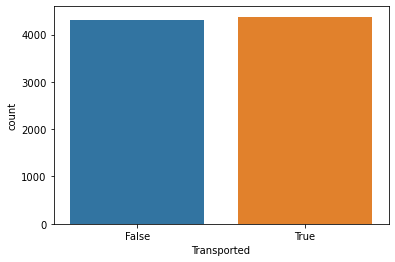

In [7]:
# Transported (Target)

sns.countplot(data['Transported'])
# data['Transported'].value_counts().plot(kind='bar', xlabel='No of Passengers', ylabel='Transported', 
#                                         title='Target Distribution') # 不同寫法

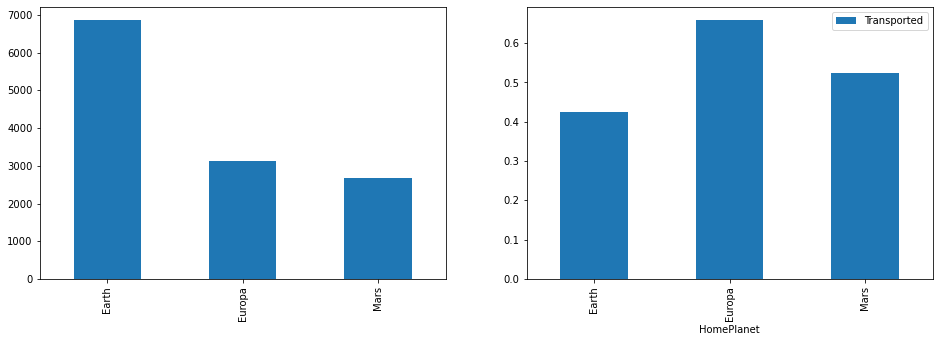

In [8]:
# HomePlanet

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax0 = data['HomePlanet'].value_counts().plot(kind='bar', ax=ax[0])
ax1 = data.groupby('HomePlanet').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])
# ax1.set_xlabel('Home Planet')
# ax1.set_ylabel('Proportion of Passengers')
# ax1.set_title('Proportion of Transported Passengers vs Home Planet')

# fig, ax = plt.subplots(1, 2, figsize=(16, 5)) # 另一種寫法，有待研究
# sns.countplot(data['HomePlanet'], hue=data['HomePlanet'], ax=ax[0])
# sns.countplot(data['HomePlanet'], hue=data['HomePlanet'], ax=ax[1])

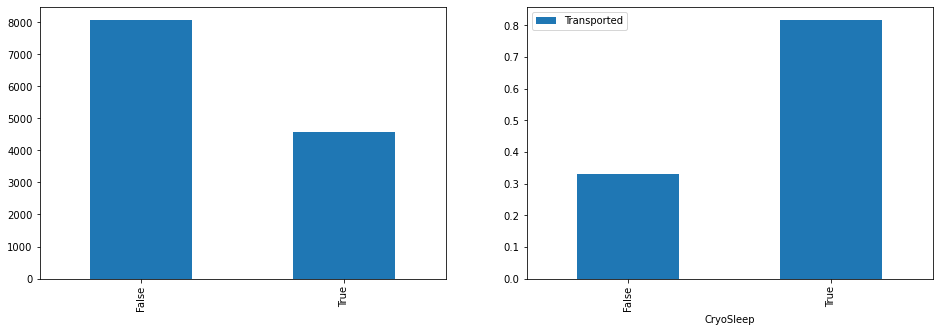

In [9]:
# CryoSleep

fig, ax  = plt.subplots(1, 2, figsize=(16, 5))

ax0 = data['CryoSleep'].value_counts().plot(kind='bar', ax=ax[0])
ax1 = data.groupby('CryoSleep').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])

# 有 80% 進行低溫睡眠的乘客被傳送

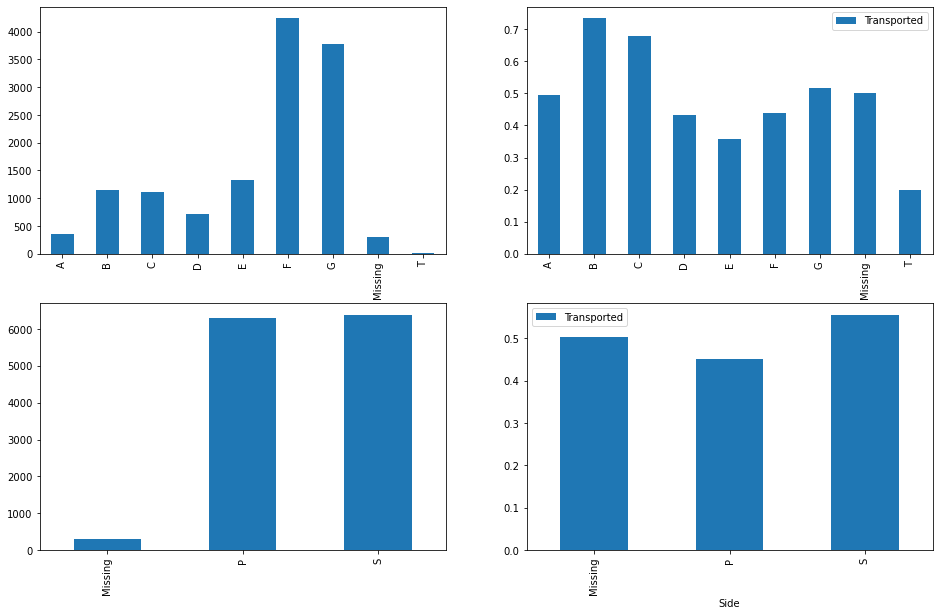

In [10]:
# Cabin

data[['Deck', 'Num', 'Side']] = data['Cabin'].str.split('/', expand=True).fillna('Missing')

# Deck, Side

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax00 = data['Deck'].value_counts().sort_index().plot(kind='bar', ax=ax[0][0])
ax01 = data.groupby('Deck').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[0][1])
ax10 = data['Side'].value_counts().sort_index().plot(kind='bar', ax=ax[1][0])
ax11 = data.groupby('Side').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1][1])

# 大多人在 Deck=F, G
# Deck = B, C 被傳送的比例比較高
# Side，P 跟 S 的人數差不多
# Side = S 被傳送的比例高一點

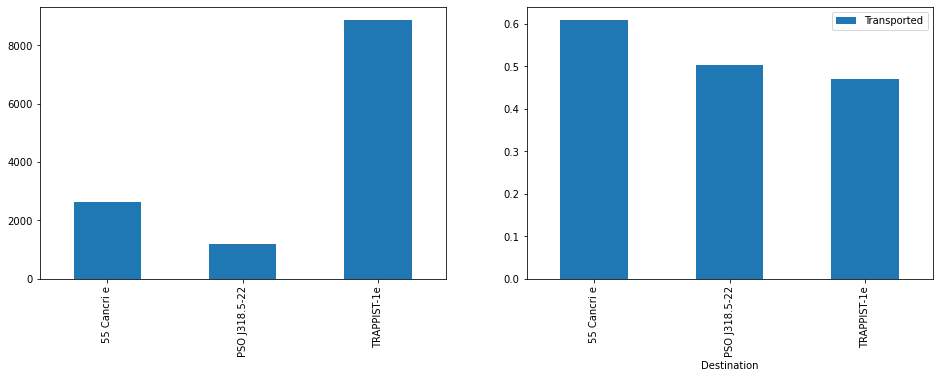

In [11]:
# Destination

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax0 = data['Destination'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax1 = data.groupby('Destination').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])

# 超過一半以上的乘客要前往 TRAPPIST-1e

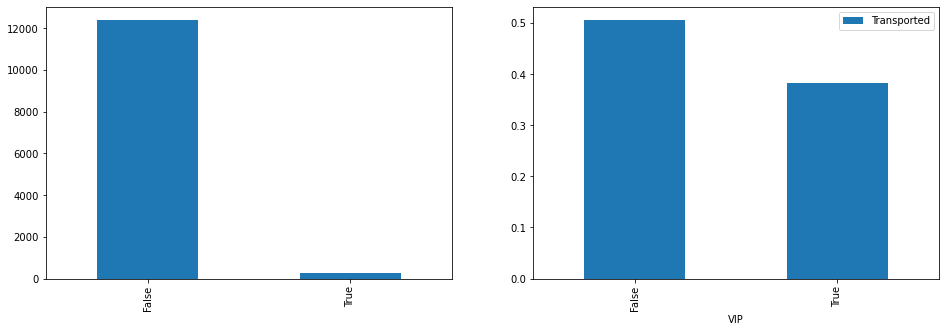

In [12]:
# VIP

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax0 = data['VIP'].value_counts().sort_index().plot(kind='bar', ax=ax[0])
ax1 = data.groupby('VIP').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

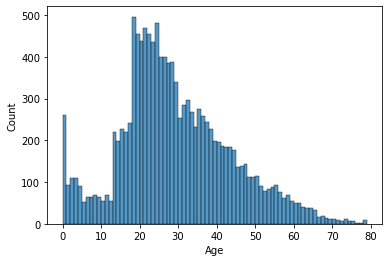

In [13]:
# Age

ax = sns.histplot(data, x='Age', binwidth=1)

data['Age'].describe()

# 平均年齡 27 歲

Text(0.5, 1.0, '% of Passengers Transported by Age Group')

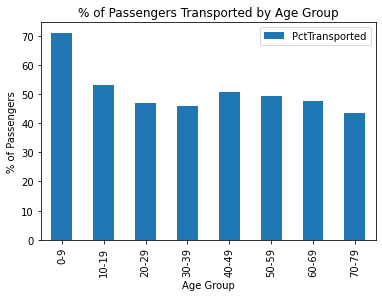

In [14]:
agegroup_mapper = {0: '0-9', 1: '10-19', 2: '20-29', 3: '30-39', 4: '40-49', 5: '50-59', 6: '60-69', 7: '70-79', 8: '80-89'}
data['AgeGroup'] = data['Age'].apply(lambda x: np.floor(x/10)).map(agegroup_mapper) # np.floor() 向下取最大整數
ax = (pd.pivot_table(data, index='AgeGroup', columns='Transported', values='PassengerId', aggfunc='count')
     .rename(columns={True: 'True', False: 'False'})
     .assign(PctTransported=lambda x: x['True']/(x['True']+x['False'])*100) # ( 被傳送/(被傳送+沒被傳送) )*100
     .reset_index()
     .plot(kind='bar', x='AgeGroup', y='PctTransported'))
ax.set_xlabel('Age Group')
ax.set_ylabel('% of Passengers')
ax.set_title('% of Passengers Transported by Age Group')

# 0-9 歲的 Group 有很高的機率被傳送

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4315.0,2004.149247,3137.414321,0.0,678.0,907.0,2093.0,35987.0
True,4378.0,885.689127,2297.838344,0.0,0.0,0.0,809.0,31076.0


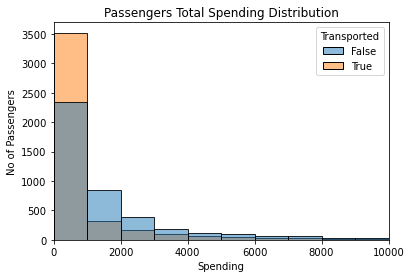

In [15]:
# Spending

fill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data[fill_cols] = data[fill_cols].fillna(0)
data['TotalSpend'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

ax = sns.histplot(data, x='TotalSpend', hue='Transported', binwidth=1000, palette=["C0", "C1"])
ax.set_xlabel('Spending')
ax.set_ylabel('No of Passengers')
ax.set_title('Passengers Total Spending Distribution')
ax.set_xlim(0, 10000)

data.groupby('Transported')['TotalSpend'].describe()

# 平均支出較少的，被傳送的比例較高

Number of Groups:  9280


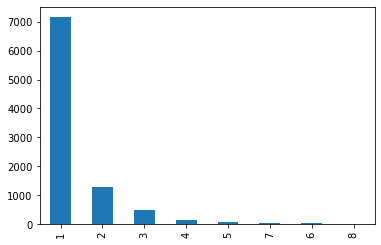

In [16]:
# Group Level Features

data[['PassengerGroup', 'PassengerNo']] = data['PassengerId'].str.split('_', expand=True)
print('Number of Groups: ', data.PassengerGroup.nunique())

# Number of Passenger Per Group

ax = data.PassengerGroup.value_counts().value_counts().plot(kind='bar')

# 大多是 1 個人的 Group
# 最大的 Group 有 8 人

In [26]:
# Group Transported

(data.groupby('PassengerGroup', as_index=False)
.agg({'PassengerNo':'count', 'Transported': lambda x: sum(x == True)})
.assign(AllTransported = lambda x: x['Transported'] == x['PassengerNo'])
.groupby(['PassengerNo', 'AllTransported'], as_index = False)
.agg({'PassengerGroup':'count'})
.pivot(index = 'PassengerNo', columns = 'AllTransported', values = 'PassengerGroup')
.fillna(0)
.rename(columns = {False: 'False', True:'True'})
.assign(PctAllTransported = lambda x: x['True']/(x['True'] + x['False'])))

# 不確定是否整個 Group 會一起被傳送
# 有 Group 越小被傳送機率越高的趨勢

AllTransported,False,True,PctAllTransported
PassengerNo,,,
1,4971.0,2174.0,0.304269
2,1030.0,265.0,0.204633
3,421.0,81.0,0.161355
4,132.0,22.0,0.142857
5,70.0,6.0,0.078947
6,39.0,3.0,0.071429
7,46.0,1.0,0.021277
8,19.0,0.0,0.000000


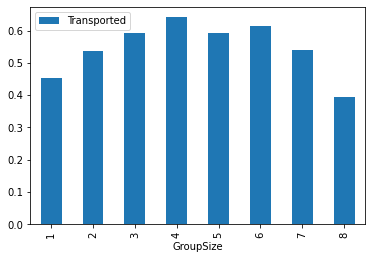

In [18]:
data['GroupSize'] = data.groupby('PassengerGroup')['PassengerId'].transform('nunique')
ax = data.groupby('GroupSize', as_index=False).agg({'Transported': 'mean'}).plot(kind='bar', x='GroupSize', y='Transported')

In [19]:
# Group Home Planet

(data
 .dropna(subset = ['HomePlanet'])
 .groupby('PassengerGroup', as_index = False)
 .agg({'PassengerNo':'count', 'HomePlanet': 'nunique'})
 .groupby('HomePlanet', as_index = False)
 .agg({'PassengerNo':'count'})
 .rename(columns = {'HomePlanet':'HomePlanetCount', 'PassengerNo':'PassengerGroup'})
)

# 是否整個 Group 都來自同個星球
# 同一組 Group 的乘客應該都來自同個星球

,HomePlanetCount,PassengerGroup
0,1,9124


In [20]:
(data
 .dropna(subset = ['Destination'])
 .groupby('PassengerGroup', as_index = False)
 .agg({'PassengerNo':'count', 'Destination': 'nunique'})
 .groupby('Destination', as_index = False)
 .agg({'PassengerNo':'count'})
 .rename(columns = {'Destination':'DestinationCount', 'PassengerNo':'PassengerGroup'})
)

,DestinationCount,PassengerGroup
0,1,8056
1,2,997
2,3,73


In [21]:
# Group Cryo Sleep

(data
 .groupby('PassengerGroup', as_index = False)
 .agg({'PassengerNo':'count', 'CryoSleep': lambda x: sum(x == True)})
 .assign(AllCryoSleep = lambda x: x['CryoSleep'] == x['PassengerNo'])
 .groupby(['PassengerNo', 'AllCryoSleep'], as_index = False)
 .agg({'PassengerGroup':'count'})
 .pivot(index = 'PassengerNo', columns = 'AllCryoSleep', values = 'PassengerGroup')
 .fillna(0)
 .rename(columns = {False: 'False', True:'True'})
 .assign(PctGroupCryoSleep = lambda x: x['True']/(x['True'] + x['False'])))

# 是否整個 Group 進行低溫睡眠都睡一起
# 大的 Group 的一起進行低溫睡眠的機率比較小

AllCryoSleep,False,True,PctGroupCryoSleep
PassengerNo,,,
1,4905.0,2240.0,0.313506
2,1094.0,201.0,0.155212
3,466.0,36.0,0.071713
4,153.0,1.0,0.006494
5,74.0,2.0,0.026316
6,42.0,0.0,0.000000
7,47.0,0.0,0.000000
8,19.0,0.0,0.000000


In [22]:
# Group VIP

(data
 .groupby('PassengerGroup', as_index = False)
 .agg({'PassengerNo':'count', 'VIP': lambda x: sum(x == True)})
 .assign(VIP = lambda x: x['VIP'] == x['PassengerNo'])
 .groupby(['PassengerNo', 'VIP'], as_index = False)
 .agg({'PassengerGroup':'count'})
 .pivot(index = 'PassengerNo', columns = 'VIP', values = 'PassengerGroup')
 .fillna(0)
 .rename(columns = {False: 'False', True:'True'})
 .assign(VIP = lambda x: x['True']/(x['True'] + x['False'])))

VIP,False,True,VIP
PassengerNo,,,
1,7026.0,119.0,0.016655
2,1293.0,2.0,0.001544
3,502.0,0.0,0.000000
4,154.0,0.0,0.000000
5,76.0,0.0,0.000000
6,42.0,0.0,0.000000
7,47.0,0.0,0.000000
8,19.0,0.0,0.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     12970 non-null  object 
 1   HomePlanet      12682 non-null  object 
 2   CryoSleep       12660 non-null  object 
 3   Cabin           12671 non-null  object 
 4   Destination     12696 non-null  object 
 5   Age             12700 non-null  float64
 6   VIP             12674 non-null  object 
 7   RoomService     12970 non-null  float64
 8   FoodCourt       12970 non-null  float64
 9   ShoppingMall    12970 non-null  float64
 10  Spa             12970 non-null  float64
 11  VRDeck          12970 non-null  float64
 12  Name            12676 non-null  object 
 13  Transported     8693 non-null   object 
 14  Deck            12970 non-null  object 
 15  Num             12970 non-null  object 
 16  Side            12970 non-null  object 
 17  AgeGroup        12700 non-null 